# Project 1: Integration of Mergesort & Insertion Sort

In Mergesort, when the sizes of subarrays are small, the overhead of many recursive
calls makes the algorithm inefficient. Therefore, in real use, we often combine
Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better
efficiency. The idea is to set a small integer S as a threshold for the size of subarrays.
Once the size of a subarray in a recursive call of Mergesort is less than or equal to S,
the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

#### Step 1: Import necessary library

In [1]:
import random
import time
import matplotlib.pyplot as plt

#### Step 2: Define a counter class to determine the number of comparison

In [2]:
class Counter:
    def __init__(self):
        self.value = 0
    def count(self):
        self.value += 1

#### Step 3: Define merge sort

(a) Merge function for merge sort

In [3]:
def merge(list1, list2, counter: Counter):
    sorted_list = []
    i, j = 0, 0
    if list1 == [] or list2 == []:
        return list1 + list2
    while i < len(list1) and j < len(list2):
        counter.count()
        if list1[i] <= list2[j]:
            sorted_list.append(list1[i])
            i += 1
        else:
            sorted_list.append(list2[j])
            j += 1
    sorted_list += list1[i:] + list2[j:]
    return sorted_list

(b) Merge sort

In [4]:
def merge_sort(arr, counter: Counter):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid], counter)
    right_half = merge_sort(arr[mid:], counter)
    return merge(left_half, right_half, counter)

#### Step 4: Define insertion sort

In [5]:
def insertion_sort(arr, counter: Counter):
    for i in range(1, len(arr)):
        for j in range(i-1, -1, -1):
            counter.count()
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
            else:
                break
    return arr

#### Step 5: Define a combination of merge sort and insertion sort
1. If the array is small enough (≤ S), use insertion_sort.
2. Split the array into two halves.
3. Recursively sort each half using the same hybrid strategy.
4. Combine the two sorted halves using the merge function.

In [6]:
def merge_insertion_sort(arr, S, counter: Counter):
    if len(arr) <= S:
        return insertion_sort(arr, counter)
    else:
        mid = len(arr) // 2
        left_half = merge_insertion_sort(arr[:mid], S, counter)
        right_half = merge_insertion_sort(arr[mid:], S, counter)
        return merge(left_half, right_half, counter)

#### Step 6: Define a function to test the performance of the merge_insertion_sort function
1. Generate a list of random integer with size n
2. Sort the list using merge_insertion_sort function

In [7]:
def test(n, S):
    arr = [random.randint(1, n) for _ in range(n)]
    counter = Counter()
    start_time1 = time.time()
    sorted_arr1 = merge_insertion_sort(arr, S, counter)
    end_time1 = time.time()
    # print(sorted_arr1)
    # print()
    return counter.value, end_time1 - start_time1

#### Step 7: Implement the function to analyze trend
1. With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.
2. With the input size n fixed, plot the number of key comparisons over different values of S.
3. Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

=== Varying S with fixed n ===


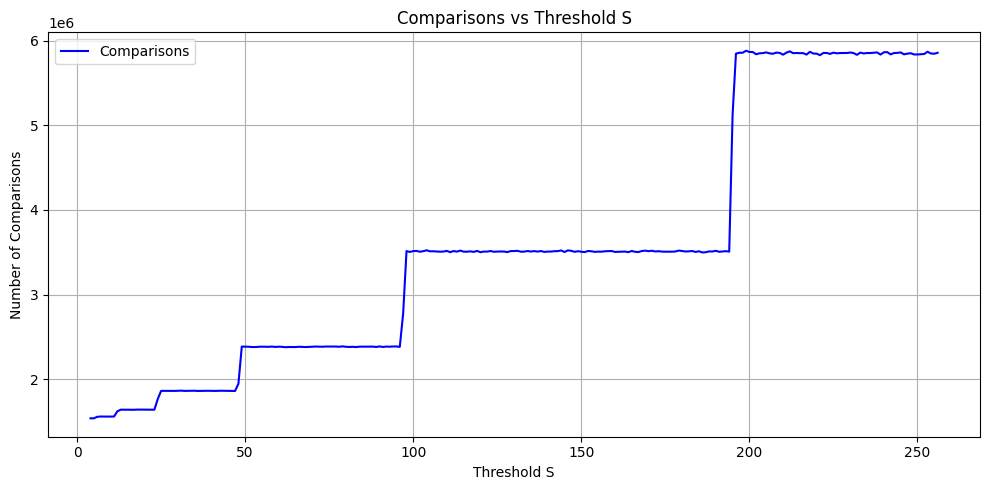

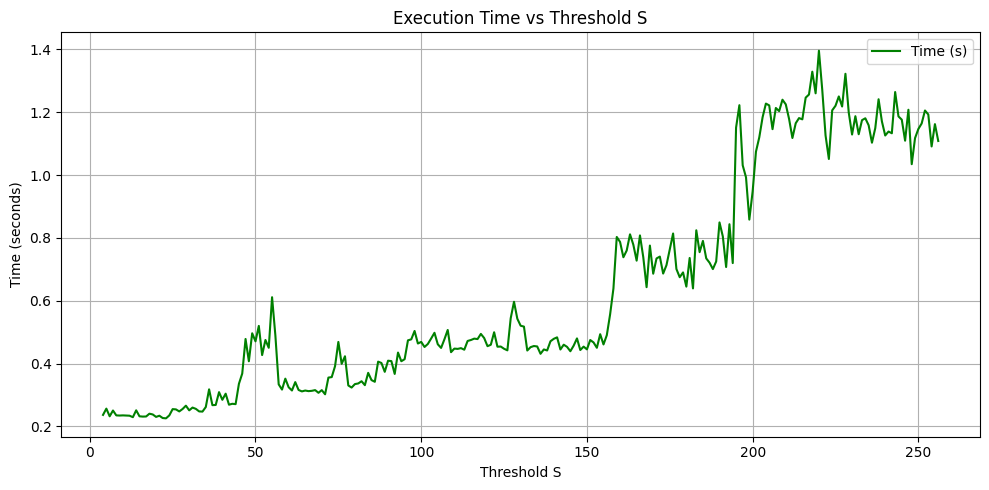

In [ ]:
if __name__ == "__main__":

    #S fixed, vary n
    # print("=== Varying n with fixed S ===")
    # S = int(input("Enter threshold S:"))
    # sizes = [10**3, 10**4, 10**5, 10**6, 10**7]
    # for n in sizes:
    #     comparisons, t = test(n, S)
    #     print(f"Array Size: {n}, Threshold: {S}, Comparisons: {comparisons}, Time: {t:.4f} seconds")

    #n fixed, vary S
    print("=== Varying S with fixed n ===")
    n = int(input("Enter array size n:"))
    thresholds = []
    comparisons_list = []
    time_list = []
    #thresholds = [4, 8, 16, 32, 64, 128, 256]
        ##Not sure whether to use these specific thresholds or just all integers from 4 to 256
    for S in range(4,257):
        comparisons, t = test(n, S)
        thresholds.append(S)
        comparisons_list.append(comparisons)
        time_list.append(t)
        # print(f"Array Size: {n}, Threshold: {S}, Comparisons: {comparisons}, Time: {t:.4f} seconds")
    
    # Plot the graph
    plt.figure(figsize=(10, 5))
    plt.plot(thresholds, comparisons_list, label='Comparisons', color='blue')
    plt.xlabel('Threshold S')
    plt.ylabel('Number of Comparisons')
    plt.title('Comparisons vs Threshold S')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.plot(thresholds, time_list, label='Time (s)', color='green')
    plt.xlabel('Threshold S')
    plt.ylabel('Time (seconds)')
    plt.title('Execution Time vs Threshold S')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

        